In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
digits = load_digits()
print(digits.keys())


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [5]:
X = digits.data
y = digits.target

print("Feature shape:",X.shape)
print("Target shape:",y.shape)

Feature shape: (1797, 64)
Target shape: (1797,)


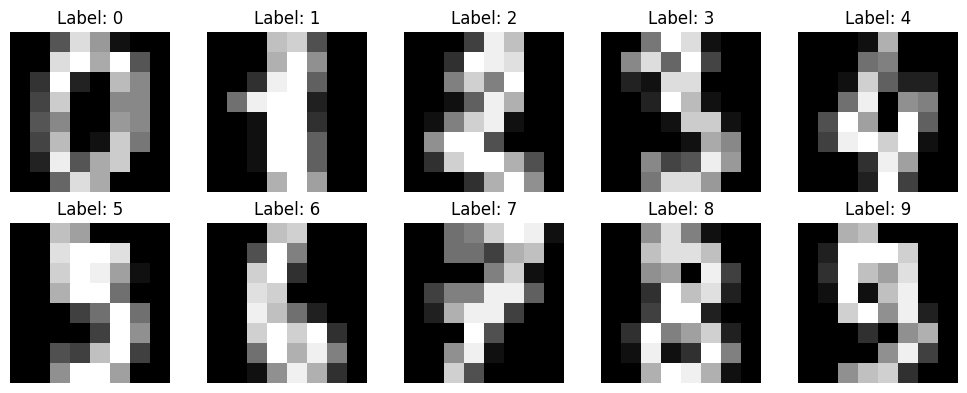

In [6]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



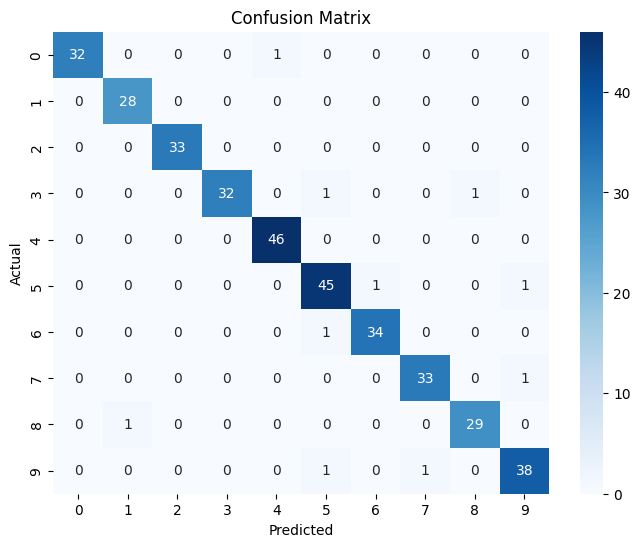

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
index = 22  # You can change this to any number
sample_image = X_test[index].reshape(1, -1)  # Reshape for prediction
true_label = y_test[index]


In [14]:
predicted_label = model.predict(sample_image)[0]

print(f"Predicted Digit: {predicted_label}")
print(f"Actual Digit: {true_label}")


Predicted Digit: 9
Actual Digit: 9


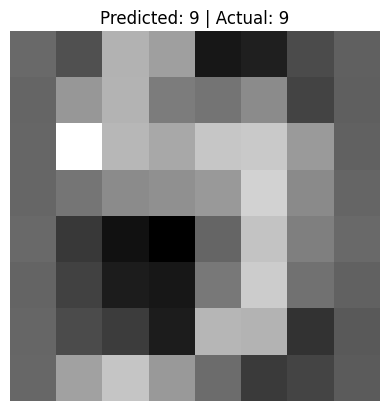

In [15]:
plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
plt.title(f"Predicted: {predicted_label} | Actual: {true_label}")
plt.axis('off')
plt.show()


In [34]:
import cv2

In [35]:
img = cv2.imread('test.png',cv2.IMREAD_GRAYSCALE)

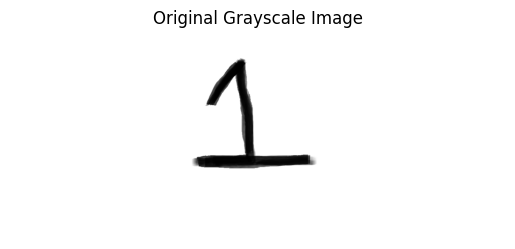

In [36]:
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


In [37]:
img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)


In [38]:
img = (img / 255.0) * 16
img = img.astype(int)


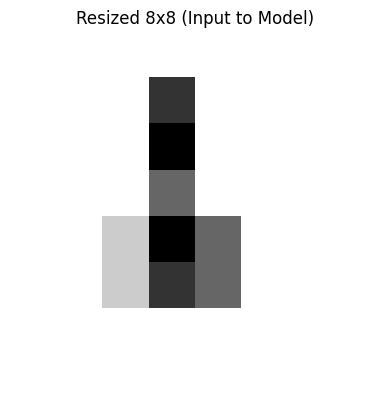

In [39]:
plt.imshow(img, cmap='gray')
plt.title("Resized 8x8 (Input to Model)")
plt.axis('off')
plt.show()


In [40]:
flat_img = img.reshape(1, -1)
prediction = model.predict(flat_img)[0]
print(f"Model Prediction: {prediction}")


Model Prediction: 1
